# Load GPU

Dikarenakan proses analisis ini termasuk dalam deep learning, maka dibutuhkan processor tambahan yakni GPU agar proses komputasi lebih cepat dan efektif.

Hal pertama yang dilakukan yakni mengimpor dan loading GPU yang ada pada Google Colaboratory.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.0094877660000066
GPU (s):
0.0441344079999908
GPU speedup over CPU: 68x


#Load Drive

Dikarenakan dataset yang digunakan terdapat pada Drive, maka perlu melakukan import dan loading Drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install and Load Libraries

Melakukan install dan import libraries yang digunakan dalam project ini.

In [4]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 8.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=e8f2dd9e2b7c3e1c2440df4b382e4e697d198134749fdb7145c0e0edfc4429ef
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from torchvision.utils import make_grid
import keras
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
import matplotlib.cm as cm
from IPython.display import Image, display
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from rarfile import RarFile
from PIL import Image
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf
import pickle

In [16]:
import os
import os.path
import shutil
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import random

# Data Loading

Melakukan loading dataset yang ada.

In [6]:
# df = RarFile(r'/content/drive/My Drive/Colab Notebooks/Data Skripsi Fix.rar')
# df.extractall('/content/data')
# df.close()

Membagi dataset menjadi tiga bagian, yakni data latih, data validasi, dan data uji dengan perbandingan 8:1:1.

In [7]:
train_path = '/content/drive/MyDrive/Bangkit/Dataset3/train'
test_path = '/content/drive/MyDrive/Bangkit/Dataset3/val'
val_path = '/content/drive/MyDrive/Bangkit/Dataset3/val'

# Exploratory Data Analysis

Melakukan eksplorasi pada dataset yang ada.

Yang pertama yakni mengecek jumlah kelas yang ada.

In [8]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  5


Diperoleh terdapat 3 kelas dalam dataset.

Selanjutnya dilakukan pendefinisian untuk visualisasi sampel citra rontgen dada.

In [9]:
def sampleImage(sampe_image_path):
  img = load_img(sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Excellent

(2812, 2521, 3)


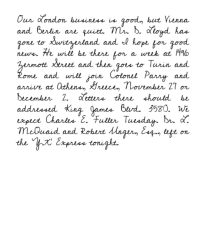

In [10]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset3/train/Excellent/Untitled-1-Recovered-Recovered2_0000s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2812 x 2521.

Great

(2808, 2521, 3)


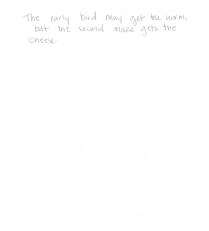

In [11]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset3/train/Great/w0001_s03_pPHR_r01.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2808 x 2521.

Selanjutnya dilakukan pengecekan kembali informasi dataset

In [12]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset3/train/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 3222 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [255, 406, 1248, 942, 371]
Dimensi citra: 2521 x 2810


In [13]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset3/val/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 2497 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [196, 320, 954, 739, 288]
Dimensi citra: 2521 x 2810


In [14]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset3/val/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 2497 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [196, 320, 954, 739, 288]
Dimensi citra: 2521 x 2810


Selanjutnya melihat secara random 9 citra pada semua kelas.

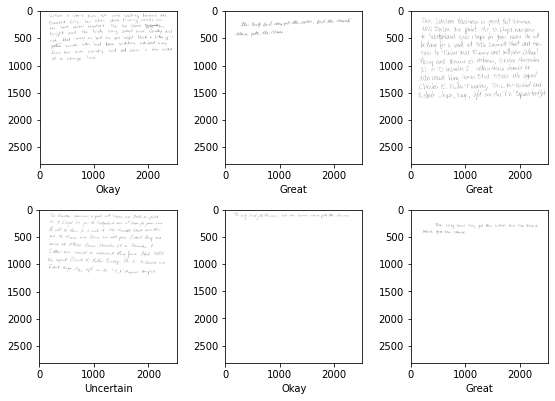

In [15]:
plt.subplots(1,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=6)):  
    im = Image.open(imageFilesList[k])                    
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.xlabel(classNames[imageClass[k]])
    plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

# Data Preprocessing

## Balancing Training Data

In [18]:
image_path =Path('/content/drive/MyDrive/Bangkit/Dataset3')

In [61]:
base_dir = image_path
ExcellentTemp = os.path.join(base_dir,'ExcellentTemp')
ExcellentTemp2 = os.path.join(base_dir, 'ExcellentTemp2')
ExcellentTemp3 = os.path.join(base_dir, 'ExcellentTemp3')
PoorTemp = os.path.join(base_dir, 'PoorTemp')
PoorTemp2 = os.path.join(base_dir, 'PoorTemp2')
PoorTemp3 = os.path.join(base_dir, 'PoorTemp3')
PoorTemp4 = os.path.join(base_dir, 'PoorTemp4')
UncertainTemp = os.path.join(base_dir, 'UncertainTemp')
UncertainTemp2 = os.path.join(base_dir, 'UncertainTemp2')
GreatTemp = os.path.join(base_dir, 'GreatTemp')

In [20]:
list_directory=[ExcellentTemp, 
                ExcellentTemp2, 
                ExcellentTemp3,
                PoorTemp,
                PoorTemp2, 
                PoorTemp3, 
                PoorTemp4, 
                UncertainTemp, 
                UncertainTemp2]
for i in list_directory:
  os.mkdir(i)

In [62]:
list_directory = [GreatTemp]
for i in list_directory:
  os.mkdir(i)

### Poor

In [21]:
from PIL import Image, ImageEnhance

tempDir = '/content/drive/MyDrive/Bangkit/Dataset3/PoorTemp'
tempDir2 = '/content/drive/MyDrive/Bangkit/Dataset3/PoorTemp2'
tempDir3 = '/content/drive/MyDrive/Bangkit/Dataset3/PoorTemp3'
tempDir4 = '/content/drive/MyDrive/Bangkit/Dataset3/PoorTemp4'
poorDir = '/content/drive/MyDrive/Bangkit/Dataset3/train/Poor'

#### tempDir

In [22]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir, filename))

In [23]:
for filename in os.listdir(tempDir):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDir, filename), os.path.join(tempDir, new_f))
    # f = os.path.join(poorDir, filename)
    # # checking if it is a file
    # if os.path.isfile(f):
    #     print(os.path.splitext(f)[0])
    # os.path.splitext(f)[0]
    


# for file in os.listdir(poorDir) :
#     f_img = poorDir+"/"+file
#     img = Image.open(f_img)
#     enhancer = ImageEnhance.Contrast(img)
#     factor = 1.5 #increase contrast
#     im_output = enhancer.enhance(factor)
#     im_output.save(Path(f_img).stem + "edited.png")

In [24]:
count=0
for filename in os.listdir(tempDir):
  f = filename
  # print(f)
  count +=1
print(count)

255


In [25]:
for filename in os.listdir(tempDir):
    # new_f_contrasted_name = os.path.splitext(f)[0] + '-contrasted.png'
    # new_f_contrasted = os.path.join(tempDir, new_f)
    f_img = os.path.join(tempDir, filename)
    # img = Image.open(f_img)
    
    # enhancer = ImageEnhance.Contrast(im)
    # factor = 1.5 #increase contrast
    # im_output = enhancer.enhance(factor)
    # # im_output.save(new_f_contrasted)
    # im_output.save(f_img)
    # # img.save(f_img)

    # f_img = f+"/"+file
    img = Image.open(f_img)

    # img = img.resize((2296,1724))
    enhancer = ImageEnhance.Contrast(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir2

In [26]:
for filename in os.listdir(poorDir):
  # print(filename)
  shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir2, filename))

In [27]:
for filename in os.listdir(tempDir2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpen.png'

  os.rename(os.path.join(tempDir2, filename), os.path.join(tempDir2, new_f))


In [28]:
count=0
for filename in os.listdir(tempDir2):
  f = filename
  # print(f)
  count +=1
print(count)

255


In [29]:
for filename in os.listdir(tempDir2):

    f_img = os.path.join(tempDir2, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir3

In [30]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir3, filename))

In [31]:
for filename in os.listdir(tempDir3):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-contrasted2.png'

  os.rename(os.path.join(tempDir3, filename), os.path.join(tempDir3, new_f))


In [32]:
count=0
for filename in os.listdir(tempDir3):
  f = filename
  # print(f)
  count +=1
print(count)

255


In [33]:
for filename in os.listdir(tempDir3):

    f_img = os.path.join(tempDir3, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

#### tempDir4

In [34]:
for filename in os.listdir(poorDir):
    shutil.copy(os.path.join(poorDir, filename), os.path.join(tempDir4, filename))

In [35]:
for filename in os.listdir(tempDir4):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-brightened.png'

  os.rename(os.path.join(tempDir4, filename), os.path.join(tempDir4, new_f))


In [36]:
count=0
for filename in os.listdir(tempDir4):
  f = filename
  # print(f)
  count +=1
print(count)

255


In [37]:
for filename in os.listdir(tempDir4):

    f_img = os.path.join(tempDir4, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1
    img = enhancer.enhance(factor)

    img.save(f_img)
    # print(f_img)

### Uncertain

In [38]:
tempDirUncertain = '/content/drive/MyDrive/Bangkit/Dataset3/UncertainTemp'
tempDirUncertain2 = '/content/drive/MyDrive/Bangkit/Dataset3/UncertainTemp2'
uncertainDir = '/content/drive/MyDrive/Bangkit/Dataset3/train/Uncertain'

#### tempDirUncertain

In [39]:
for filename in os.listdir(uncertainDir):
    shutil.copy(os.path.join(uncertainDir, filename), os.path.join(tempDirUncertain, filename))

In [40]:
for filename in os.listdir(tempDirUncertain):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirUncertain, filename), os.path.join(tempDirUncertain, new_f))

In [41]:
count=0
for filename in os.listdir(tempDirUncertain):
  f = filename
  # print(f)
  count +=1
print(count)

406


In [42]:
for filename in os.listdir(tempDirUncertain):
    f_img = os.path.join(tempDirUncertain, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)


#### tempDirUncertain2

In [43]:
for filename in os.listdir(uncertainDir):
    shutil.copy(os.path.join(uncertainDir, filename), os.path.join(tempDirUncertain2, filename))

In [44]:
for filename in os.listdir(tempDirUncertain2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirUncertain2, filename), os.path.join(tempDirUncertain2, new_f))

In [45]:
count=0
for filename in os.listdir(tempDirUncertain2):
  f = filename
  # print(f)
  count +=1
print(count)

406


In [46]:
for filename in os.listdir(tempDirUncertain2):

    f_img = os.path.join(tempDirUncertain2, filename)

    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)
    # print(f_img)

### Excellent

In [47]:
tempDirExcellent = '/content/drive/MyDrive/Bangkit/Dataset3/ExcellentTemp'
tempDirExcellent2 = '/content/drive/MyDrive/Bangkit/Dataset3/ExcellentTemp2'
tempDirExcellent3 = '/content/drive/MyDrive/Bangkit/Dataset3/ExcellentTemp3'
excellentDir = '/content/drive/MyDrive/Bangkit/Dataset3/train/Excellent'

#### tempDirExcellent

In [48]:
for filename in os.listdir(excellentDir):
    shutil.copy(os.path.join(excellentDir, filename), os.path.join(tempDirExcellent, filename))

In [49]:
for filename in os.listdir(tempDirExcellent):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellent, filename), os.path.join(tempDirExcellent, new_f))

In [50]:
count=0
for filename in os.listdir(tempDirExcellent):
  f = filename
  # print(f)
  count +=1
print(count)

371


In [51]:
for filename in os.listdir(tempDirExcellent):
    f_img = os.path.join(tempDirExcellent, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)


#### tempDirExcellent2

In [52]:
for filename in os.listdir(excellentDir)[:130]:
    shutil.copy(os.path.join(excellentDir, filename), os.path.join(tempDirExcellent2, filename))

In [53]:
for filename in os.listdir(tempDirExcellent2):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-sharpened.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellent2, filename), os.path.join(tempDirExcellent2, new_f))

In [54]:
count=0
for filename in os.listdir(tempDirExcellent2):
  f = filename
  # print(f)
  count +=1
print(count)

371


In [55]:
for filename in os.listdir(tempDirExcellent2):
    f_img = os.path.join(tempDirExcellent2, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Sharpness(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)


#### tempDirExcellent3

In [56]:
for filename in os.listdir(excellentDir):
    shutil.copy(os.path.join(excellentDir, filename), os.path.join(tempDirExcellent3, filename))

In [57]:
for filename in os.listdir(tempDirExcellent3):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited-contrasted2.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirExcellent3, filename), os.path.join(tempDirExcellent3, new_f))

In [58]:
count=0
for filename in os.listdir(tempDirExcellent3):
  f = filename
  # print(f)
  count +=1
print(count)

371


In [59]:
for filename in os.listdir(tempDirExcellent3):
    f_img = os.path.join(tempDirExcellent3, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)


### Great

In [63]:
tempDirGreat = '/content/drive/MyDrive/Bangkit/Dataset3/GreatTemp'
greatDir = '/content/drive/MyDrive/Bangkit/Dataset3/train/Great'

#### tempDirGreat

In [64]:
for filename in os.listdir(greatDir)[:300]:
    shutil.copy(os.path.join(greatDir, filename), os.path.join(tempDirGreat, filename))

In [65]:
for filename in os.listdir(tempDirGreat):
  f = filename
  new_f = os.path.splitext(f)[0] + '-edited.png'
  # os.rename(filename, )
  # f = os.path.splitext(f)[0]
  # print(f)
  os.rename(os.path.join(tempDirGreat, filename), os.path.join(tempDirGreat, new_f))

In [66]:
count=0
for filename in os.listdir(tempDirGreat):
  f = filename
  # print(f)
  count +=1
print(count)

300


In [67]:
for filename in os.listdir(tempDirGreat):
    f_img = os.path.join(tempDirGreat, filename)
    img = Image.open(f_img)

    enhancer = ImageEnhance.Contrast(img)
    factor = 1
    img = enhancer.enhance(factor)
    
    img.save(f_img)


## Oversampling Dataset

In [68]:
train_Poor = poorDir
train_Uncertain = uncertainDir
train_Excellent = excellentDir
train_Great = greatDir
print(train_Poor)
print(train_Uncertain)
print(train_Excellent)
print(train_Great)

/content/drive/MyDrive/Bangkit/Dataset3/train/Poor
/content/drive/MyDrive/Bangkit/Dataset3/train/Uncertain
/content/drive/MyDrive/Bangkit/Dataset3/train/Excellent
/content/drive/MyDrive/Bangkit/Dataset3/train/Great


In [69]:
for filename in os.listdir(tempDir):
    shutil.copy(os.path.join(tempDir, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir2):
    shutil.copy(os.path.join(tempDir2, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir3):
    shutil.copy(os.path.join(tempDir3, filename), os.path.join(train_Poor, filename))
for filename in os.listdir(tempDir4):
    shutil.copy(os.path.join(tempDir4, filename), os.path.join(train_Poor, filename))

for filename in os.listdir(tempDirUncertain):
    shutil.copy(os.path.join(tempDirUncertain, filename), os.path.join(train_Uncertain, filename))
for filename in os.listdir(tempDirUncertain2):
    shutil.copy(os.path.join(tempDirUncertain2, filename), os.path.join(train_Uncertain, filename))

for filename in os.listdir(tempDirExcellent):
    shutil.copy(os.path.join(tempDirExcellent, filename), os.path.join(train_Excellent, filename))
for filename in os.listdir(tempDirExcellent2):
    shutil.copy(os.path.join(tempDirExcellent2, filename), os.path.join(train_Excellent, filename))
for filename in os.listdir(tempDirExcellent3):
    shutil.copy(os.path.join(tempDirExcellent3, filename), os.path.join(train_Excellent, filename))

for filename in os.listdir(tempDirGreat):
    shutil.copy(os.path.join(tempDirGreat, filename), os.path.join(train_Great, filename))

## Cek yang udah ditambal

In [71]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset3/train/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 6467 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [1275, 1218, 1248, 1242, 1484]
Dimensi citra: 2521 x 2810


In [72]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset3/val/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 2497 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [196, 320, 954, 739, 288]
Dimensi citra: 2521 x 2810


In [73]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset3/val/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 2497 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [196, 320, 954, 739, 288]
Dimensi citra: 2521 x 2810


## Image Data Generator

Data processing pertama yang dilakukan yakni augmentasi data pada data latih, seperti zoom range, brightness, and process input. Kemudian merubah dimensi citra menjadi 224 x 224 piksel.

In [74]:
train_data_gen = ImageDataGenerator(brightness_range=[0.7,1.0],
                                    zoom_range=[1.0,1.7],
                                    preprocessing_function= preprocess_input
                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           color_mode='grayscale', 
                                           target_size=(224,224)
                                           )

Found 6467 images belonging to 5 classes.


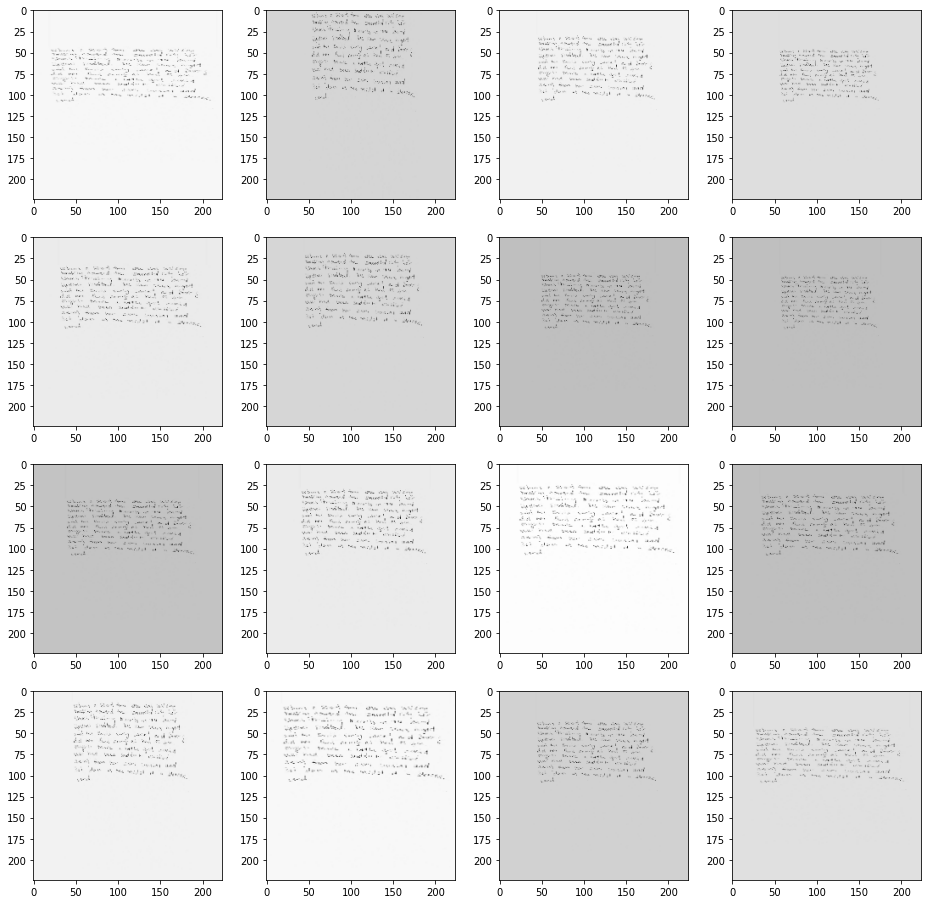

In [75]:
image_path = "/content/drive/MyDrive/Bangkit/Dataset3/train/Uncertain/w0001_s01_pWOZ_r03.png"
img = keras.preprocessing.image.load_img(image_path, target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)



pic = train_data_gen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))

for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

Pada data validasi juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [76]:
validation_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

valid = validation_data_gen.flow_from_directory(directory= val_path,
                                                color_mode='grayscale', 
                                                target_size=(224,224)
                                                )

Found 2497 images belonging to 5 classes.


Pada data uji juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [77]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          color_mode='grayscale', 
                                          target_size=(224,224), 
                                          shuffle= False
                                          )

Found 2497 images belonging to 5 classes.


In [78]:
train.class_indices

{'Excellent': 0, 'Great': 1, 'Okay': 2, 'Poor': 3, 'Uncertain': 4}

Berikut merupakan visualisasi dari augmentasi data yang dilakukan pada data latih.

In [79]:
class_type = {0:'Excellent',  1 : 'Great', 2:'Okay', 3:'Poor',4:'Uncertain'}

In [80]:
labels = ['Excellent', 'Great', 'Okay', 'Poor','Uncertain']

# Model Defining

Pada penelitian ini menggunakan EfficientNet B0 sebagai pre-trained model dengan tidak mem-freeze lapisan-lapisan yang ada. Hal ini guna memperbarui parameter.

In [84]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [85]:
for layer in efficientNet.layers:         
  layer.trainable = True

## Layers of the EfficientNet

In [86]:
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

## Visualize of the EfficientNet

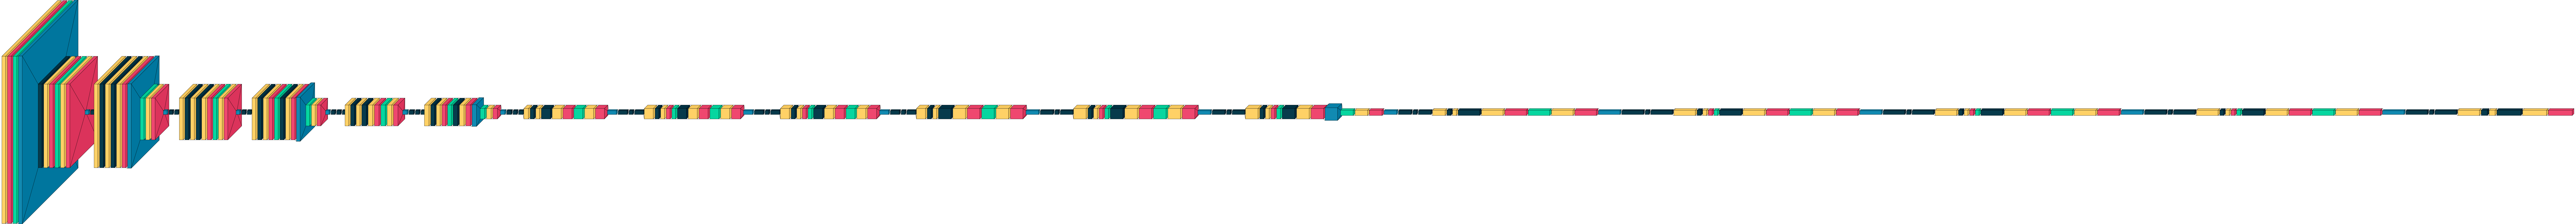

In [87]:
visualkeras.layered_view(efficientNet)

In [88]:
x = Flatten()(efficientNet.output)
x = tf.keras.layers.Dense(numberOfClass,activation='softmax')(x)

# creating our model.
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = x)

Layers of the Model

In [89]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                              

## Visualize of the Model

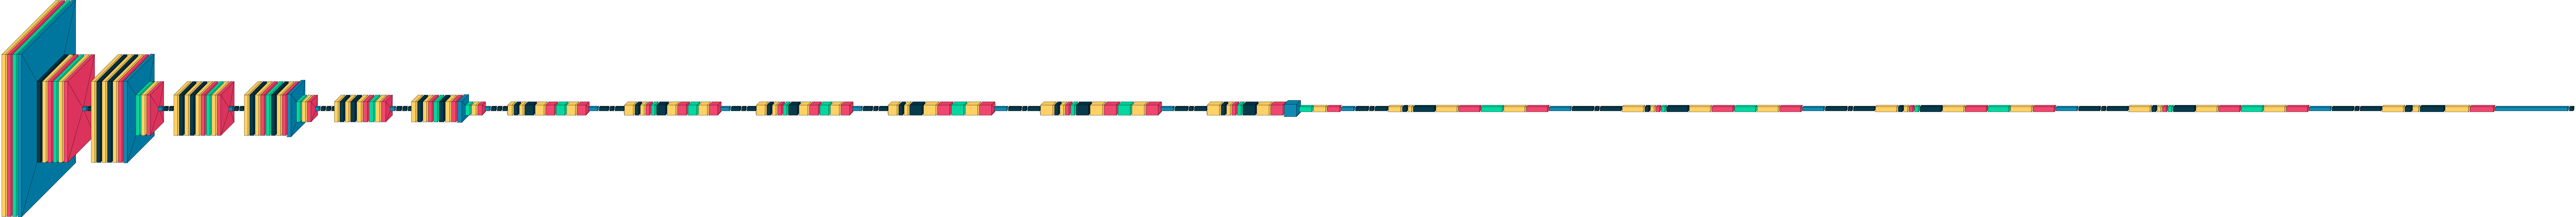

In [90]:
visualkeras.layered_view(model)

Selanjutnya dilakukan pendefinisian model dengan optimasi Adam dan optimasi SGD. Fungsi loss yang digunakan yakni categorical crossentropy dan metrics akurasi.

## Adam Optimizer

In [91]:
modela1 = model
opt_a1 = tf.keras.optimizers.Adam(learning_rate=1e-2)
modela1.compile(loss='categorical_crossentropy',
              optimizer = opt_a1, 
              metrics= ['accuracy'])

In [92]:
modela2 = model
opt_a2 = tf.keras.optimizers.Adam(learning_rate=1e-3)
modela2.compile(loss='categorical_crossentropy',
              optimizer = opt_a2, 
              metrics= ['accuracy'])

## SGD

In [93]:
models1 = model
opt_s1 = tf.keras.optimizers.SGD(learning_rate=1e-2)
models1.compile(loss='categorical_crossentropy',
              optimizer = opt_s1, 
              metrics= ['accuracy'])

In [94]:
models2 = model
opt_s2 = tf.keras.optimizers.SGD(learning_rate=1e-3)
models2.compile(loss='categorical_crossentropy',
              optimizer = opt_s2, 
              metrics= ['accuracy'])

# Model Training

Selanjutnya dilakukan model training.

## Adam

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 15, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a1 = modela1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
203/203 [==============================] - ETA: 0s - loss: 1.8098 - accuracy: 0.3227
Epoch 1: val_accuracy improved from -inf to 0.16875, saving model to Modela1_Best.h5
203/203 [==============================] - 672s 3s/step - loss: 1.8098 - accuracy: 0.3227 - val_loss: 2.2772 - val_accuracy: 0.1688
Epoch 2/300
203/203 [==============================] - ETA: 0s - loss: 1.6382 - accuracy: 0.3869
Epoch 2: val_accuracy improved from 0.16875 to 0.25938, saving model to Modela1_Best.h5
203/203 [==============================] - 359s 2s/step - loss: 1.6382 - accuracy: 0.3869 - val_loss: 1.9370 - val_accuracy: 0.2594
Epoch 3/300
203/203 [==============================] - ETA: 0s - loss: 1.5611 - accuracy: 0.4143
Epoch 3: val_accuracy did not improve from 0.25938
203/203 [==============================] - 341s 2s/step - loss: 1.5611 - accuracy: 0.4143 - val_loss: 2.0184 - val_accuracy: 0.1750
Epoch 4/300
203/203 [==============================] - ETA: 0s - loss: 1.4782 - accuracy:

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a2 = modela2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

## SGD

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s1 = models1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s2 = models2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

# Visualize of the Graph

Dari hasil model training, kemudian dilakukan visualisasi dengan grafik terhadap hasil validasi loss dan validasi accuracy pada masing-masing model.

In [ ]:
print(hist_a1.history.keys())

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_loss"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_loss"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_loss"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_loss"],label = "SGD LR 0,001")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_accuracy"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_accuracy"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_accuracy"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_accuracy"],label = "SGD LR 0,001")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Adam

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["loss"],label = "Training Loss")
plt.plot(hist_a1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["loss"],label = "Training Loss")
plt.plot(hist_a2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## SGD

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["loss"],label = "Training Loss")
plt.plot(hist_s1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["loss"],label = "Training Loss")
plt.plot(hist_s2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Best Model

Diperoleh model yang sangat baik yaitu EfficientNet B0 dengan Adam optimizer dan learning rate 0,001. Kemudian load model untuk dilakukan evaluasi model.

In [ ]:
modelf = load_model("Models2_Best (1).h5")

In [ ]:
modelf.summary()

# Model Evaluation

Selanjutnya melakukan evaluasi model menggunakan data uji.

In [ ]:
predictions = modelf.predict_generator(test)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test.classes
class_labels = list(test.class_indices.keys()) 

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

        five       0.96      0.80      0.87       288
        four       0.73      0.90      0.81       739
         one       0.96      0.77      0.85       196
       three       0.86      0.80      0.83       954
         two       0.82      0.80      0.81       320

    accuracy                           0.83      2497
   macro avg       0.87      0.81      0.83      2497
weighted avg       0.84      0.83      0.83      2497



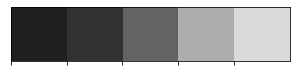

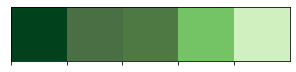

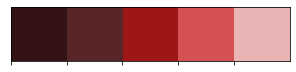

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[229  38   0  17   4]
 [  5 664   1  60   9]
 [  0  21 151  17   7]
 [  5 145   5 764  35]
 [  0  37   1  26 256]]


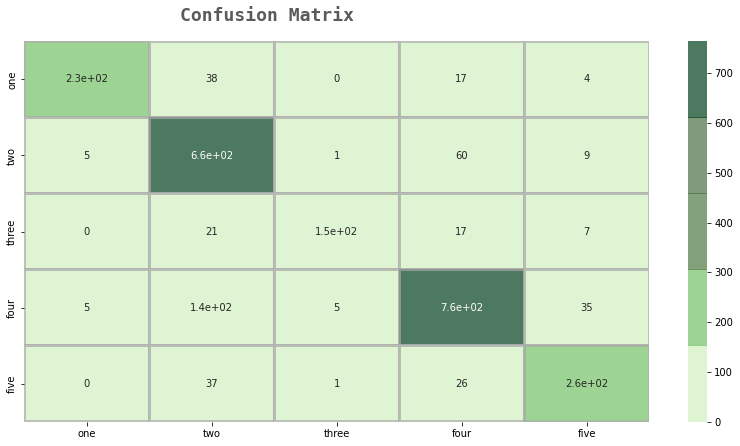

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(true_classes, predicted_classes),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(true_classes, predicted_classes))
plt.show()

In [ ]:
def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

Upload Gambar

In [ ]:
from google.colab import files
from keras.preprocessing import image

In [ ]:
train.class_indices

{'five': 0, 'four': 1, 'one': 2, 'three': 3, 'two': 4}

Saving Untitled-1-Recovered-Recovered2_0016s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg to Untitled-1-Recovered-Recovered2_0016s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg
one 0.9998754


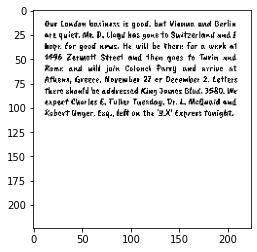

In [ ]:
def predict(image_upload):
  for fn in image_upload.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(224,224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = modelf.predict(images, batch_size=10) 
    print( labels[np.argmax(classes)], np.max(classes) )

image_test = files.upload()
predict(image_test)

# Save Model

Selanjutnya menyimpan model yang dipilih untuk selanjutnya dilakukan deployment

In [ ]:
modelf.save("model_c2.h5")